# Q.3 Linear Regression

*   Akshay Bankar(2019201011)



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import random

**Linear Regression**

**Cost Function:-**

We need to minimize the cost function:

$ J(θ_1,θ_2)=(1/2m) ∑(h_0 x(i)−y(i))^2 $

Now we calculate the derivatives and have:

$ \frac{∂} {∂θ} J(θ_0,θ_1)=(1/m) ∑(h_θ(x(i))−y(i)) $ 

New theta will be:

$ θ_i = θ_i − α \frac{∂} {∂θ_i} J(θ_0,θ_1) $

**Mean squared error:**

It is simply the average of the square of the difference between the original values and the predicted values.


In [0]:
class linear_regression:
    def __init__(self, learn_rate, iters, train, test, train_label, test_label, wt):
        self.b = 0
        self.m = wt #[0]*len(train[0])
        self.feature_size = len(train[0])
        self.learning_rate = learn_rate
        self.num_iters = iters
        self.train_data = train
        self.train_op = train_label
        self.test_data = test
        self.test_op = test_label

    def compute_error(self, data, data_op):
        total_error = 0
        for i in range(data):
            total_error += (data_op - (np.dot(self.m,data[i])+b))**2
        return total_error
    
    def gradient_descent(self):
        self.train_data = list(self.train_data)
        self.train_op = list(self.train_op)
        for i in range(self.num_iters):
            for j in range(len(self.train_data)):
                self.stoch_grad(self.train_data[j], self.train_op[j], len(self.train_data))
        #print(self.m)
        #print(self.b)
        
    def stoch_grad(self, data_row, data_op, train_size):
        m_tmp = self.m
        b_tmp = self.b
        dotprod = [a*b for a,b in zip(m_tmp,data_row)]
        dotprod = np.sum(dotprod)
        tmp = (self.learning_rate*( dotprod + b_tmp - data_op))/train_size
        for k in range(self.feature_size):
            self.m[k] = m_tmp[k] - tmp*data_row[k]
        self.b = b_tmp - tmp
            
    def test(self):
        self.test_data = list(self.test_data)
        self.test_op = list(self.test_op)
        predict_op = []
        
        for i in range(len(self.test_data)):
            dotprod = [a*b for a,b in zip(self.m,self.test_data[i])]
            dotprod = np.sum(dotprod)
            pred = (dotprod+self.b)
            #print(pred)
            predict_op.append(pred)
        return predict_op

## Plot for three different learning rate = [0.1, 0.01, 0.001] and at various iterations.

At learning rate  0.1
Mean-Square-error:  2135.5391923374123	R2 score :  -43.04362124237
Mean-Square-error:  21.42508484450231	R2 score :  0.5581264322552372
Mean-Square-error:  20.855761701500654	R2 score :  0.5698682223215834
Mean-Square-error:  21.140178146635108	R2 score :  0.5640023828045422
Mean-Square-error:  21.19749137699666	R2 score :  0.5628203477385137
Mean-Square-error:  21.207940452766003	R2 score :  0.5626048447230836
Mean-Square-error:  21.209819936554638	R2 score :  0.5625660820197744
Mean-Square-error:  21.21015719865338	R2 score :  0.5625591262850402
Mean-Square-error:  21.210217692592703	R2 score :  0.562557878650644
Mean-Square-error:  21.210228542426687	R2 score :  0.5625576548823421
Mean-Square-error:  21.21023048836196	R2 score :  0.5625576147491352
Mean-Square-error:  21.210230837367646	R2 score :  0.5625576075511993
-------------------------------------------------------------------
At learning rate  0.01
Mean-Square-error:  12788.181692709888	R2 score :  -262

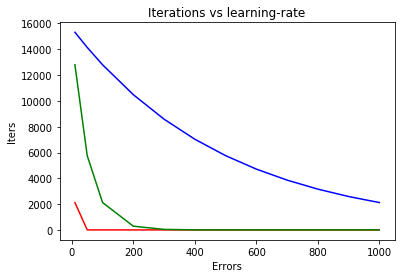

In [13]:
data = pd.read_csv('/content/drive/My Drive/SMAI/Assignment-2/q3/airfoil.csv', header=None)
#print(data.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:, -1], test_size=0.20)
'''
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
'''
X_train = np.array((X_train - X_train.mean())/X_train.std())#preprocessing.scale(X_train)
#y_train = preprocessing.scale(y_train)
# #print(X_train)
X_test = np.array((X_test - X_test.mean())/X_test.std())#preprocessing.scale(X_test)
#y_test = preprocessing.scale(y_test)
#print(X_test)
#X_test = np.asarray(X_test)
#y_test = np.asarray(y_test)
iterations = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
learning_rate = [0.1, 0.01, 0.001]
color = ['r', 'g', 'b']
mse_learning_rate = []
fig, ax = plt.subplots()
ax.set_xlabel("Errors")
ax.set_ylabel("Iters")
ax.set_title("Iterations vs learning-rate")

for i in range(3):
    mse = []
    print ("At learning rate ",learning_rate[i])
    for iter in iterations:
        lin_reg = linear_regression(learn_rate = learning_rate[i], iters = iter, train = X_train, test = X_test,
                                    train_label = y_train, test_label = y_test, wt = [0]*len(X_train[0]))
        lin_reg.gradient_descent()
        pred_op = lin_reg.test()
        print("Mean-Square-error: ", mean_squared_error(y_test, np.array(pred_op).flatten()), end = "\t")
        print ("R2 score : ", r2_score(y_test, np.array(pred_op).flatten()))
        mse.append(mean_squared_error(y_test, np.array(pred_op).flatten()))
    print("-------------------------------------------------------------------")
    ax.plot(iterations, mse, c= color[i], label = "mse")
    mse_learning_rate.append(mse)

plt.show()

For weights =  [1, 8, 6, 5, 7]
Mean-Square-error:  12978.87281656814	R2 score :  -266.6778588456369
Mean-Square-error:  5830.91687605407	R2 score :  -119.2575421262006
Mean-Square-error:  2148.5695493629764	R2 score :  -43.31236091783279
Mean-Square-error:  308.17763320304067	R2 score :  -5.355893163125896
Mean-Square-error:  59.301302604441766	R2 score :  -0.2230373108865591
Mean-Square-error:  25.909820533740938	R2 score :  0.4656326954145804
Mean-Square-error:  21.64683013448544	R2 score :  0.5535531302997685
Mean-Square-error:  21.20677310419956	R2 score :  0.5626289202625552
Mean-Square-error:  21.197703598214435	R2 score :  0.5628159708621872
Mean-Square-error:  21.210121224178536	R2 score :  0.562559868227005
Mean-Square-error:  21.214324487304875	R2 score :  0.5624731796146946
Mean-Square-error:  21.215013496427165	R2 score :  0.5624589694063671
For weights =  [2, 3, 6, 5, 1]
Mean-Square-error:  12864.73792623878	R2 score :  -264.3239269214451
Mean-Square-error:  5796.178096816

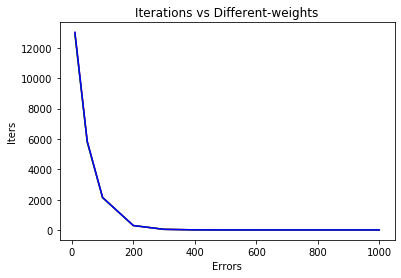

In [16]:
iterations = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
weights = []
for i in range(3):
    weights.append(random.sample(range(1, 10), len(X_train[0])))
color = ['r', 'g', 'b']
mse_weights = []
fig, ax = plt.subplots()
ax.set_xlabel("Errors")
ax.set_ylabel("Iters")
ax.set_title("Iterations vs Different-weights")
for i in range(3):
    mse = []
    print ("For weights = ",weights[i])
    for iter in iterations:
        lin_reg = linear_regression(learn_rate = 0.01, iters = iter, train = X_train, test = X_test,
                                    train_label = y_train, test_label = y_test, wt = weights[i])
        lin_reg.gradient_descent()
        pred_op = lin_reg.test()
        
        print("Mean-Square-error: ", mean_squared_error(y_test, np.array(pred_op).flatten()), end = "\t")
        print ("R2 score : ", r2_score(y_test, np.array(pred_op).flatten()))
        mse.append(mean_squared_error(y_test, np.array(pred_op).flatten()))
    ax.plot(iterations, mse, c= color[i], label = "mse")
    mse_weights.append(mse)

plt.show()

If you want to apply regression on some dataset but one of it’s features has missing values under below given conditions, how will you approach the problem. (No need of Code Experimentation)

**(a) When 0-0.5% of values are missing of that feature.**

We can fill all missing values with appropriate way. Since 99.5% data is avilable we can use it to predict the best possible value of that missing cell. 

Guessing: Guess the missing value from 99.5% data which is avialble.

Average: Fill the missing value with average

**2) When 8-10% of values are missing of that feature:**

(a)Average:Take average if its a numerical data or else take mode if it is a categoriacal data

(b)Regression Substitution: You can use multiple-regression analysis to estimate a missing value.Regression substitution predicts the missing value from the other values

(c)Deletion:That row can be dropped

**3) When 60-70% of values are missing of that feature**

(a)Deletion: That whole column can be dropped
